In [1]:
import spot
import spot.tchecker as tc
spot.setup()

In [2]:
%%tchecker cg
system:critical_region_1_10
event:tau
event:enter1
event:exit1
int:1:0:1:0:id
process:counter
location:counter:I{initial:}
location:counter:C{}
edge:counter:I:C:tau{provided: id==0 : do: id=1}
edge:counter:C:C:tau{provided: id<1 : do: id=id+1}
edge:counter:C:C:tau{provided: id==1 : do: id=1}
process:arbiter1
location:arbiter1:req{initial:}
location:arbiter1:ack{}
edge:arbiter1:req:ack:enter1{provided: id==1 : do: id=0}
edge:arbiter1:ack:req:exit1{do: id=1}
process:prodcell1
clock:1:x1
location:prodcell1:not_ready{initial:}
location:prodcell1:testing{invariant: x1<=10}
location:prodcell1:requesting{}
location:prodcell1:critical{invariant: x1<=20}
location:prodcell1:testing2{invariant: x1<=10}
location:prodcell1:safe{}
location:prodcell1:error{}
edge:prodcell1:not_ready:testing:tau{provided: x1<=20 : do: x1=0}
edge:prodcell1:testing:not_ready:tau{provided: x1>=10 : do: x1=0}
edge:prodcell1:testing:requesting:tau{provided: x1<=9}
edge:prodcell1:requesting:critical:enter1{do: x1=0}
edge:prodcell1:critical:error:tau{provided: x1>=20}
edge:prodcell1:critical:testing2:exit1{provided: x1<=9 : do: x1=0}
edge:prodcell1:testing2:error:tau{provided: x1>=10}
edge:prodcell1:testing2:safe:tau{provided: x1<=9}
sync:arbiter1@enter1:prodcell1@enter1
sync:arbiter1@exit1:prodcell1@exit1

In [3]:
cg

tchecker model
The following location(s) may be used in the formula:
- counter.I
- counter.C
- arbiter1.req
- arbiter1.ack
- prodcell1.not_ready
- prodcell1.testing
- prodcell1.requesting
- prodcell1.critical
- prodcell1.testing2
- prodcell1.safe
- prodcell1.error
The following variable(s) may be used in the formula:
- id (0..1)

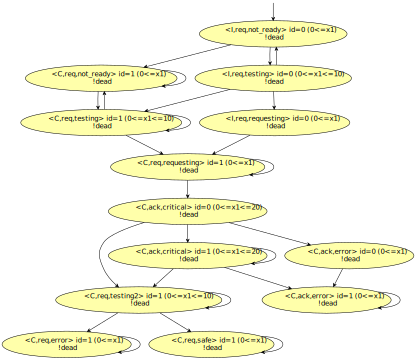

In [4]:
cg.kripke([]).show('.vA')

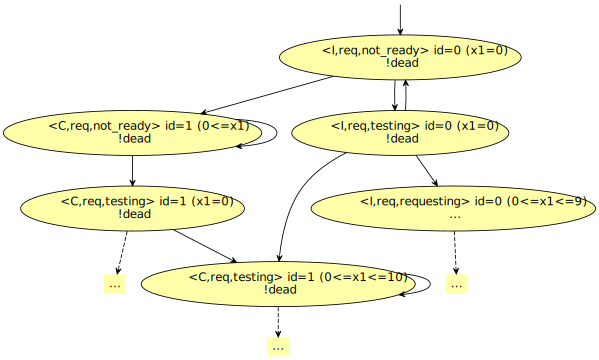

In [5]:
cg.kripke([], zone_sem=tc.non_elapsed_no_extrapolation).show('.vA<6')

In [6]:
def check(model, formula, zone_sem=tc.elapsed_extraLUplus_local):
    f = spot.formula_Not(formula)
    k = model.kripke(spot.atomic_prop_collect(f), zone_sem=zone_sem)
    return k.intersecting_run(f.translate())

def display_counterexample(*args, show='.vA'):
    run = check(*args)
    if run is None:
        print("formula is satisfied")
    else:
        return run.as_twa(True).show(show)
        

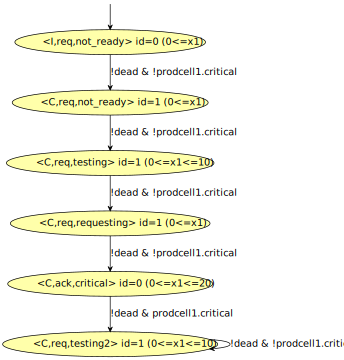

In [7]:
display_counterexample(cg, 'G!"prodcell1.critical"')